In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os 
import datetime
from scipy import stats
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [2]:
vis = pd.read_csv("vis_12_2021_01_2022.csv", index_col=[0])
vis.index = pd.to_datetime(vis.index, format="%d/%m/%Y")
vis

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,13.0,10.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,16.0,6.0,20.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,20.0,7.0,NaN,10.0,20.0,20.0,1.0,3.0,NaN
2021-12-03,10.0,13.0,3.0,13.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,20.0,3.0,15.0,7.0,20.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,12.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,15.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [3]:
stn_coord = pd.read_csv("coords.csv")
stn = stn_coord["stn"]
stn_lat = stn_coord["lat"]
stn_lon = stn_coord["lon"]

In [4]:
# cap visibility maximum to 10km
vis.columns
for i in vis.columns:
    vis[i] = np.where(vis[i] > 10, 10, vis[i])
vis
# df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,6.0,10.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,10.0,7.0,NaN,10.0,10.0,10.0,1.0,3.0,NaN
2021-12-03,10.0,10.0,3.0,10.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,10.0,3.0,10.0,7.0,10.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,10.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,10.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [5]:
vis['KAN'].describe()

count    60.000000
mean      5.536667
std       3.545537
min       0.300000
25%       2.000000
50%       5.500000
75%      10.000000
max      10.000000
Name: KAN, dtype: float64

In [6]:
bsc = xr.open_dataset("nc_files/LOTUS EUROS/2021121000_3H_LOTOSEUROS.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 25, longitude: 180, latitude: 260)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-10 ... 2021-12-13
  * longitude   (longitude) float32 -24.75 -24.25 -23.75 ... 63.75 64.25 64.75
  * latitude    (latitude) float32 0.125 0.375 0.625 0.875 ... 64.38 64.62 64.88
Data variables:
    OD550_DUST  (time, latitude, longitude) float32 ...
    SCONC_DUST  (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Sat Dec 11 01:00:03 2021: cdo -r settaxis,2021-12-10,00:00:...
    Author:       LOTOS-EUROS modelling team
    Institution:  TNO
    model:        LE
    version:      v2.2.002
    expid:        Dust-Sahara-v2-2-002
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [7]:
# 11 19

bsc.time.to_series()[19]

Timestamp('2021-12-12 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/LOTUS EUROS/")
len(nc_files)

60

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/LOTUS EUROS/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[19]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 19).sel(latitude = stn_lat[i], 
                                                     longitude = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,1.182471,0.779658,1.384688,1.272097,0.557567,1.133178,0.655069,...,1.274310,0.809891,0.824806,0.936170,1.532248,6.300942,1.688389,1.277555,1.296091,1.673572
1,ABK,8.19,6.25,2.088171,2.566951,1.438863,0.559884,0.974038,0.923627,1.772667,...,1.085633,1.010193,1.916420,1.833425,6.868594,3.516962,2.823631,1.755116,1.628832,1.845520
2,ABU,7.20,9.00,1.770652,3.705261,2.294965,0.654824,1.039298,0.872242,1.497018,...,1.378307,0.815012,0.815401,1.323106,6.046210,2.561947,1.676965,0.585341,0.731895,2.118368
3,ADO,5.20,7.60,1.392492,1.062978,2.377679,1.006754,0.513188,0.981433,1.828788,...,1.273619,0.763846,0.691414,1.642425,1.654091,4.721137,1.707623,0.905667,0.884156,1.141679
4,AKU,5.30,7.20,1.292017,1.275064,2.040309,1.252400,0.658529,0.959851,1.155876,...,1.578061,0.784041,0.885253,1.771266,1.785974,5.403388,2.499743,1.497686,1.282116,1.190683
5,ASA,6.23,6.82,1.254350,1.547401,1.463523,0.714386,0.700095,1.014195,0.958741,...,1.508631,0.855741,1.133252,1.611721,5.216644,4.139850,1.807809,1.069900,1.332633,1.586838
6,AWK,7.07,6.20,1.965203,1.575783,1.359513,0.627278,0.756427,1.206643,1.157483,...,1.210811,0.976125,1.556816,1.622040,5.773528,3.642690,2.082881,1.466957,1.499910,1.565331
7,BAU,9.82,10.28,3.616114,2.984152,0.710507,0.836277,1.294270,2.341886,4.566654,...,0.252413,0.496697,1.534204,7.150720,7.676257,3.210151,2.211438,0.447708,4.795308,2.666431
8,BEN,5.60,6.33,1.069443,1.154848,1.430048,0.862771,0.609416,1.116874,0.768684,...,1.584238,1.054754,1.327209,1.883101,3.186351,5.049205,2.468008,1.558799,1.944273,1.746205
9,BID,6.00,9.80,1.132128,3.607692,2.560652,0.984696,1.676885,1.052499,1.829461,...,0.735913,0.792210,0.909078,1.121632,6.154048,2.379522,1.327525,0.369504,0.616786,2.894089


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,1.182471,2.088171,1.770652,1.392492,1.292017,1.25435,1.965203,3.616114,1.069443,...,3.575806,1.201477,1.34039,1.396976,1.486743,1.260095,0.763295,0.783043,3.886295,1.745625
1,2021-12-04 09:00:00,0.779658,2.566951,3.705261,1.062978,1.275064,1.547401,1.575783,2.984152,1.154848,...,2.579093,0.776591,1.324151,2.063669,2.724335,1.03188,2.51766,1.227947,1.529264,2.682492
2,2021-12-05 09:00:00,1.384688,1.438863,2.294965,2.377679,2.040309,1.463523,1.359513,0.710507,1.430048,...,0.442965,1.876789,1.506516,1.012205,1.125015,1.181326,2.615924,1.171388,0.37324,0.722844
3,2021-12-06 09:00:00,1.272097,0.559884,0.654824,1.006754,1.2524,0.714386,0.627278,0.836277,0.862771,...,2.115224,1.179057,1.2382,0.537345,0.479115,0.572842,1.057132,0.539856,0.640282,0.6846
4,2021-12-07 09:00:00,0.557567,0.974038,1.039298,0.513188,0.658529,0.700095,0.756427,1.29427,0.609416,...,0.492828,0.7016,0.835547,0.681561,0.45653,0.542757,0.974539,0.317695,1.187608,0.776326
5,2021-12-08 09:00:00,1.133178,0.923627,0.872242,0.981433,0.959851,1.014195,1.206643,2.341886,1.116874,...,3.571855,0.699613,2.198442,1.055411,1.267083,1.271032,0.86825,1.217283,0.681243,2.157619
6,2021-12-09 09:00:00,0.655069,1.772667,1.497018,1.828788,1.155876,0.958741,1.157483,4.566654,0.768684,...,5.038481,1.521776,1.247865,0.783874,0.540383,0.672094,1.275826,0.535008,3.077571,2.158506
7,2021-12-10 09:00:00,1.096447,3.890365,2.161223,1.224105,1.391303,1.596424,2.980815,1.574592,1.227255,...,1.09174,1.315493,1.017653,2.483457,2.248266,1.714307,2.01221,1.332639,2.03544,1.094758
8,2021-12-11 09:00:00,2.304695,1.842382,1.720994,2.062296,2.207458,2.156008,2.349488,0.78157,2.241504,...,0.398386,1.887672,1.230164,1.972336,2.058862,2.399238,0.808928,2.510168,0.648444,0.639174
9,2021-12-12 09:00:00,1.351045,0.690473,0.392781,0.952663,1.124828,1.10737,0.919015,0.910087,1.303471,...,0.7789,1.12671,0.773575,0.670194,0.813157,0.76513,0.514728,0.859046,0.346847,0.448396


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,1.182471,2.088171,1.770652,1.392492,1.292017,1.25435,1.965203,3.616114,1.069443,1.132128,...,3.575806,1.201477,1.34039,1.396976,1.486743,1.260095,0.763295,0.783043,3.886295,1.745625
2021-12-04,0.779658,2.566951,3.705261,1.062978,1.275064,1.547401,1.575783,2.984152,1.154848,3.607692,...,2.579093,0.776591,1.324151,2.063669,2.724335,1.03188,2.51766,1.227947,1.529264,2.682492
2021-12-05,1.384688,1.438863,2.294965,2.377679,2.040309,1.463523,1.359513,0.710507,1.430048,2.560652,...,0.442965,1.876789,1.506516,1.012205,1.125015,1.181326,2.615924,1.171388,0.37324,0.722844
2021-12-06,1.272097,0.559884,0.654824,1.006754,1.2524,0.714386,0.627278,0.836277,0.862771,0.984696,...,2.115224,1.179057,1.2382,0.537345,0.479115,0.572842,1.057132,0.539856,0.640282,0.6846
2021-12-07,0.557567,0.974038,1.039298,0.513188,0.658529,0.700095,0.756427,1.29427,0.609416,1.676885,...,0.492828,0.7016,0.835547,0.681561,0.45653,0.542757,0.974539,0.317695,1.187608,0.776326
2021-12-08,1.133178,0.923627,0.872242,0.981433,0.959851,1.014195,1.206643,2.341886,1.116874,1.052499,...,3.571855,0.699613,2.198442,1.055411,1.267083,1.271032,0.86825,1.217283,0.681243,2.157619
2021-12-09,0.655069,1.772667,1.497018,1.828788,1.155876,0.958741,1.157483,4.566654,0.768684,1.829461,...,5.038481,1.521776,1.247865,0.783874,0.540383,0.672094,1.275826,0.535008,3.077571,2.158506
2021-12-10,1.096447,3.890365,2.161223,1.224105,1.391303,1.596424,2.980815,1.574592,1.227255,2.52639,...,1.09174,1.315493,1.017653,2.483457,2.248266,1.714307,2.01221,1.332639,2.03544,1.094758
2021-12-11,2.304695,1.842382,1.720994,2.062296,2.207458,2.156008,2.349488,0.78157,2.241504,1.57196,...,0.398386,1.887672,1.230164,1.972336,2.058862,2.399238,0.808928,2.510168,0.648444,0.639174


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,3.886295
2021-12-04,2.0,1.529264
2021-12-05,5.0,0.37324
...,...,...
2022-01-29,5.0,4.205796
2022-01-30,5.0,2.328918
2022-01-31,8.0,2.114041
2022-02-01,NaN,3.8325


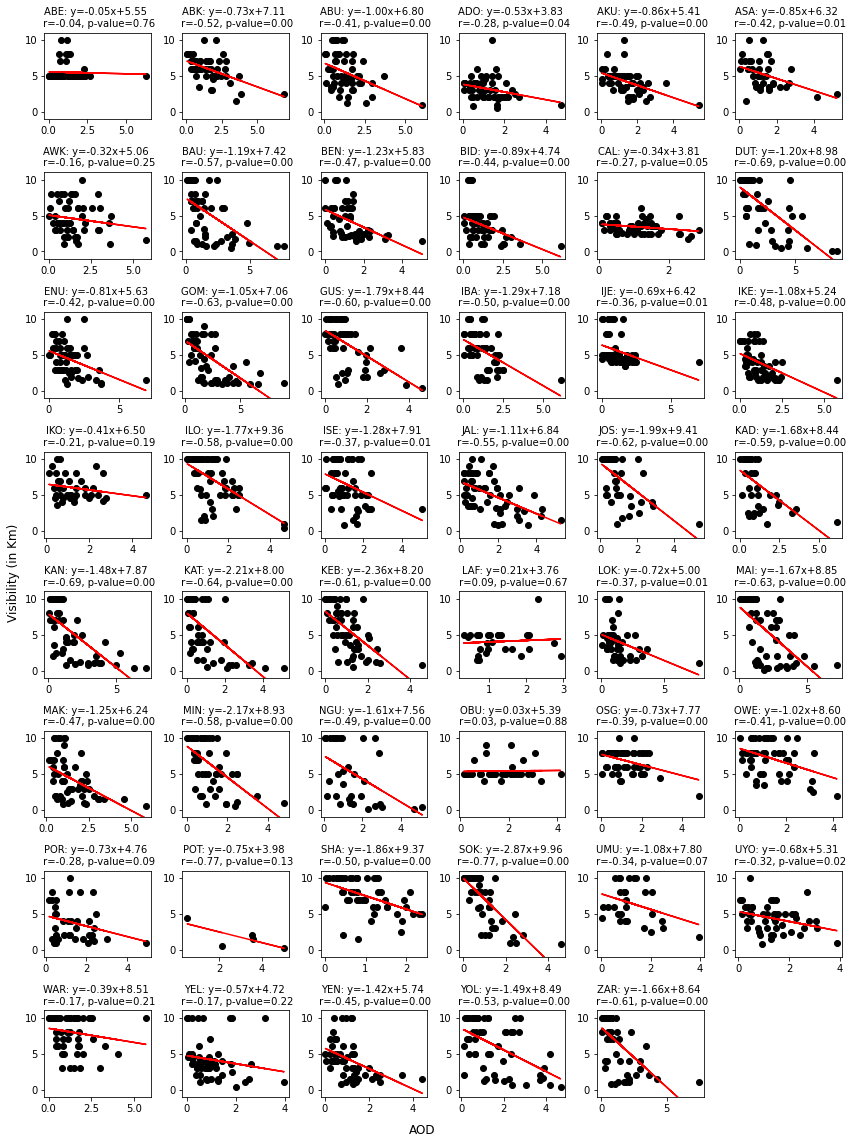

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.04,0.76,1
1,6.25,8.19,ABK,-0.52,0.00,2
2,9.00,7.20,ABU,-0.41,0.00,2
3,7.60,5.20,ADO,-0.28,0.04,2
4,7.20,5.30,AKU,-0.49,0.00,2
5,6.82,6.23,ASA,-0.42,0.01,2
6,6.20,7.07,AWK,-0.16,0.25,1
7,10.28,9.82,BAU,-0.57,0.00,2
8,6.33,5.60,BEN,-0.47,0.00,2
9,9.80,6.00,BID,-0.44,0.00,2


In [15]:
# cor_df.to_csv("cor_files/day1/LOTUS EUROS_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/LOTUS EUROS_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/LOTUS EUROS_3d.csv", index=False)

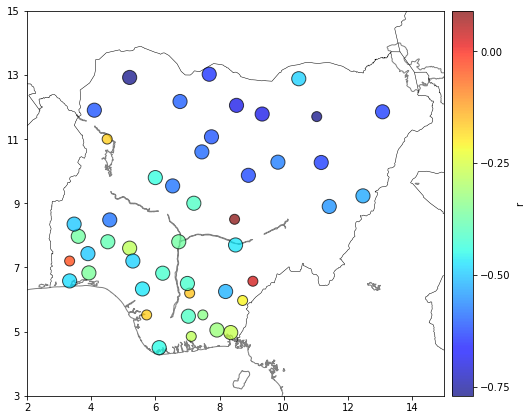

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()